In [3]:
import utils 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

cifar100_class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


pd.set_option('precision', 4)

# Analyzing the behavior of embedding models with Continual Learning

The purpose of this notebook is to take a deeper dive into what exactly is happening when we continually train an image classification model that learns embeddings instead of 1-hot labels. The main motivation here is driven by the results we see when attempted to set up a simple experiment with an AlexNet image classification model trained on BERT Embeddings. 

## Experiment details:

We incrementally trained this model 5 classes at a time (50 epochs), did a 100-way validation at train time, and tested per 5-class task during test time. The whole experiment was run 5 times to obtain the final accuracy values. 

## Initial observations:

### Baseline

In [4]:
utils.get_final_acc("/nethome/bdevnani3/raid/continual/cifar100_alexnet_base_icl_itl")


[30.693335, 3.3683062]

In [5]:
run = 0
out = utils.cleaned_up_json(f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_base_icl_itl/run_{run}/logs_run_id_{run}.json")
print(out['avg_acc'])
out['acc'].style.applymap(utils.bg_color).applymap(utils.color)


30.580002


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,67.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.2,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21.4,22.6,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,29.8,35.8,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16.2,29.6,34,25.4,78.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,20,11.8,15,20.6,22.2,60.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,20.6,14,16.6,13,25,50.4,60.8,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20,16.2,20.4,13.4,40.4,40.8,57.8,39.2,0,0,0,0,0,0,0,0,0,0,0,0
8,19.8,21,21.2,14.4,39.6,24,51.8,35.4,46.4,0,0,0,0,0,0,0,0,0,0,0
9,20,20,17.6,12.8,31.6,37,47,28.4,44.2,46.8,0,0,0,0,0,0,0,0,0,0


In [6]:
classes = list(out['labels_per_task'].iloc[12].values)
for c in classes:
    print(c)
    print(cifar100_class_names[c])

66
raccoon
10
bowl
79
spider
57
pear
31
elephant


In [7]:
for i in range(5):
    out = utils.cleaned_up_json(f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_base_icl_itl/run_{i}/logs_run_id_{i}.json")
    print(out['rii'].values.flatten().tolist())

[67.2, 74.0, 83.0, 78.0, 78.6, 60.6, 60.8, 39.2, 46.4, 46.8, 51.0, 52.0, 36.0, 44.6, 49.8, 48.4, 35.6, 48.4, 49.0, 46.4]
[64.6, 81.4, 79.4, 58.4, 79.8, 48.8, 61.4, 48.0, 56.2, 35.0, 48.0, 47.2, 65.4, 58.8, 43.8, 44.8, 43.8, 53.6, 37.4, 52.6]
[86.2, 83.4, 81.2, 65.8, 61.0, 41.6, 57.4, 32.6, 54.6, 34.8, 41.8, 34.8, 41.6, 42.0, 56.4, 32.4, 41.2, 37.6, 60.0, 44.0]
[68.4, 71.4, 74.0, 85.8, 70.0, 61.8, 53.4, 33.8, 28.8, 45.8, 33.6, 43.2, 53.4, 47.4, 45.6, 45.0, 36.8, 38.0, 30.8, 36.8]
[79.2, 89.8, 77.0, 63.8, 63.2, 57.6, 47.6, 32.4, 40.6, 48.2, 44.6, 42.4, 35.4, 30.2, 42.8, 36.0, 38.6, 40.2, 30.4, 34.0]


### Embeddings model

In [8]:
utils.get_final_acc("/nethome/bdevnani3/raid/continual/cifar100_alexnet_bert_icl_itl")

[26.155, 2.8668146]

In [11]:
run = 1
out = utils.cleaned_up_json(f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_bert_icl_itl/run_{run}/logs_run_id_{run}.json")
print(out['avg_acc'])
out['acc'].style.applymap(utils.bg_color).applymap(utils.color)


24.46


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,67.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22.4,78.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26,35.6,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22.2,21.2,31.6,62.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27.4,40.6,32.8,25,78.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,31.8,15.6,23.8,28.4,37.6,68.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19.2,16.8,25.6,23.4,28.8,20.6,76.6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,25.8,22.2,29.8,23.4,25.4,27.6,31.4,82,0,0,0,0,0,0,0,0,0,0,0,0
8,24.4,27.6,32.4,18.2,30,20.8,21.6,20.8,74.6,0,0,0,0,0,0,0,0,0,0,0
9,24.4,17.8,20.4,16.4,22.6,31.8,22.8,15,20.8,65.6,0,0,0,0,0,0,0,0,0,0


In [7]:
for i in range(5):
    out = utils.cleaned_up_json(f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_bert_icl_itl/run_{i}/logs_run_id_{i}.json")
    print(out['rii'].values.flatten().tolist())

[76.2, 78.4, 85.0, 86.4, 83.6, 81.0, 61.8, 20.4, 25.2, 20.0, 20.0, 20.0, 23.4, 20.6, 20.0, 22.4, 20.8, 48.0, 29.4, 20.0]
[76.6, 84.8, 87.6, 63.8, 84.6, 56.2, 63.6, 34.8, 32.6, 20.0, 19.8, 20.8, 55.4, 20.0, 20.0, 20.8, 29.4, 21.8, 20.2, 21.0]
[89.6, 85.8, 87.8, 75.0, 70.2, 52.4, 63.8, 28.0, 39.6, 25.2, 20.0, 32.6, 23.6, 20.0, 31.2, 19.0, 22.4, 25.8, 43.8, 21.0]
[74.4, 82.2, 88.0, 92.6, 83.8, 65.8, 76.0, 29.6, 29.4, 29.6, 30.6, 38.6, 20.2, 49.8, 31.2, 20.0, 31.6, 23.4, 30.4, 34.8]
[81.6, 96.0, 86.2, 85.0, 84.2, 61.2, 72.0, 21.0, 29.0, 33.6, 31.4, 41.2, 31.8, 25.0, 27.0, 25.6, 61.6, 37.4, 40.0, 30.2]


## Deeper Dive: 

### What is the embeddings model actually predicting?

In [9]:
%cd /nethome/bdevnani3/vis_lang/continual/src/

from model_wrapper import Bert
from models import alexnet
import torch
import torch.nn as nn


from dataloaders import cifar100 as datagenerator
from omegaconf import OmegaConf
from main import init_root, cifar100_class_names

/nethome/bdevnani3/vis_lang/continual/src


In [139]:

RUN = 0

# Set up dataloader
args = OmegaConf.load("./configs/cifar100_bert_icl_itl.yml")
args.data_dir = init_root()
args.ntasks = 20  # Doing this to get all the data as opposed to data divided into n tasks
args.seed = RUN
dataloader = datagenerator.DatasetGen(args)
taskcla= dataloader.taskcla


In [145]:
#Load model
MODEL = 7

net = alexnet.AlexNet(768)
appr = Bert(model=net, class_names=cifar100_class_names)
expt_path = f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_bert_icl_itl/run_{RUN}/"
state = torch.load(f"{expt_path}model_{MODEL}.pth", map_location=torch.device('cpu'))
appr.model.load_state_dict(state["net"])
appr.model.eval()

Initializing stsb-bert-base...


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [148]:
def get_device():
    return torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataloader.get(6)
dataset = dataloader.get(7)
test_data_loader = dataset[7]['test']
local_task_ids = list(set(dataset[7]["train_labels"]))
print(list(set(dataset[6]["train_labels"])))
print(local_task_ids)
# Verifying the data is as expected
for i, data in enumerate(test_data_loader):
    inputs, labels = data 

    device = get_device()
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = appr.model(inputs)
    print(outputs)
    out = appr.find_dist_words(
                appr.model.word_lookup, outputs, mode="cossim").argmax(dim=-1)
    print(out)
    print(out == labels)

Files already downloaded and verified
Files already downloaded and verified
Training set size:   2125 images of 32x32
Validation set size: 375 images of 32x32
Train+Val  set size: 2500 images of 32x32
Test set size:       500 images of 32x32
Files already downloaded and verified
Files already downloaded and verified
Training set size:   2125 images of 32x32
Validation set size: 375 images of 32x32
Train+Val  set size: 2500 images of 32x32
Test set size:       500 images of 32x32
[68, 80, 51, 90, 60]
[74, 18, 56, 27, 63]
tensor([[ 6.4298e-04,  3.0834e-03, -3.1351e-03,  ...,  3.8003e-03,
          1.8086e-03,  4.8269e-04],
        [ 8.3546e-04,  2.4333e-03, -3.2594e-03,  ...,  2.5185e-03,
          1.6353e-03, -6.4012e-05],
        [ 9.4677e-04,  1.7957e-03, -3.3415e-03,  ...,  2.3417e-03,
          1.3261e-03, -4.1155e-04],
        ...,
        [ 9.8958e-04,  1.9814e-03, -3.5896e-03,  ...,  1.8454e-03,
          1.1531e-03, -7.9438e-04],
        [ 1.2194e-03,  3.7384e-04, -3.0541e-03,  

In [213]:
from collections import OrderedDict
MODEL = 0
embs = []
tgts = []
for model in range(MODEL+1):
#Load model

    net = alexnet.AlexNet(768)
    appr = Bert(model=net, class_names=cifar100_class_names)
    expt_path = f"/nethome/bdevnani3/raid/continual/cifar100_alexnet_bert_icl_itl/run_{RUN}/"
    state = torch.load(f"{expt_path}model_{MODEL}.pth", map_location=torch.device('cpu'))
    appr.model.load_state_dict(state["net"])
    appr.model.eval()

    class_names = []
    class_embeddings = []
    targets = {}
    NUM_EMBEDDINGS_PER_CLASS = 50
    out_embeddings = []
    embeddings = OrderedDict()
    task_ids = []

    for task_set in range(0, 1):
        dataset = dataloader.get(task_set)
        print(set(dataset[task_set]["train_labels"]))
        test_data_loader = dataset[task_set]['test']
        local_task_ids = list(set(dataset[task_set]["train_labels"]))
        task_ids.extend(local_task_ids)
        class_names.extend(np.array(appr.class_names)[local_task_ids])
        class_embeddings.extend(appr.model.word_lookup.cpu().numpy()[local_task_ids])
        for x in local_task_ids:
            embeddings[x] = []
            targets[x] = []
        classes_finished = 0

        for inputs, labels in test_data_loader:
            with torch.no_grad():
                embedding = appr.model(inputs).cpu().numpy()
                labels = labels.cpu().numpy()

            for i, label in enumerate(labels):
                if len(embeddings[label]) < NUM_EMBEDDINGS_PER_CLASS:
                    embeddings[label].append(embedding[i])
                    targets[label].append(label)
                    # Done with this class
                    if len(embeddings[label]) == NUM_EMBEDDINGS_PER_CLASS:
                        classes_finished += 1
            
            if classes_finished >= len(class_names):
                break
    print("-----------------------")
    print([k for k,v in embeddings.items()])
    print([k for k,v in targets.items()])
    print("-----------------------")
    emb_inp = np.concatenate([class_embeddings] + [np.stack(v, axis=0) for k,v in embeddings.items()], axis=0)
    tgts_inp = np.concatenate([task_ids] + [np.stack(v, axis=0) for k,v in targets.items()], axis=0)
    embs.append(emb_inp)
    tgts.append(tgts_inp)


Initializing stsb-bert-base...
Files already downloaded and verified
Files already downloaded and verified
Training set size:   2125 images of 32x32
Validation set size: 375 images of 32x32
Train+Val  set size: 2500 images of 32x32
Test set size:       500 images of 32x32
{2, 75, 86, 55, 26}
-----------------------
[2, 75, 86, 55, 26]
[2, 75, 86, 55, 26]
-----------------------


In [206]:
print(embs[0].shape)
print(embs[1].shape)
print(np.array(tgts[0]).shape)
print(np.array(tgts[1]).shape)

(255, 768)
(255, 768)
(255,)
(255,)


In [216]:
import umap
slices = [embs[0],embs[0]+1]
relation_dict = {}
for i in range(255):
    relation_dict[i] = i
# for i in range(10,260):
#     relation_dict[i-5] = i
aligned_mapper = AU().fit(slices, relations=[relation_dict])



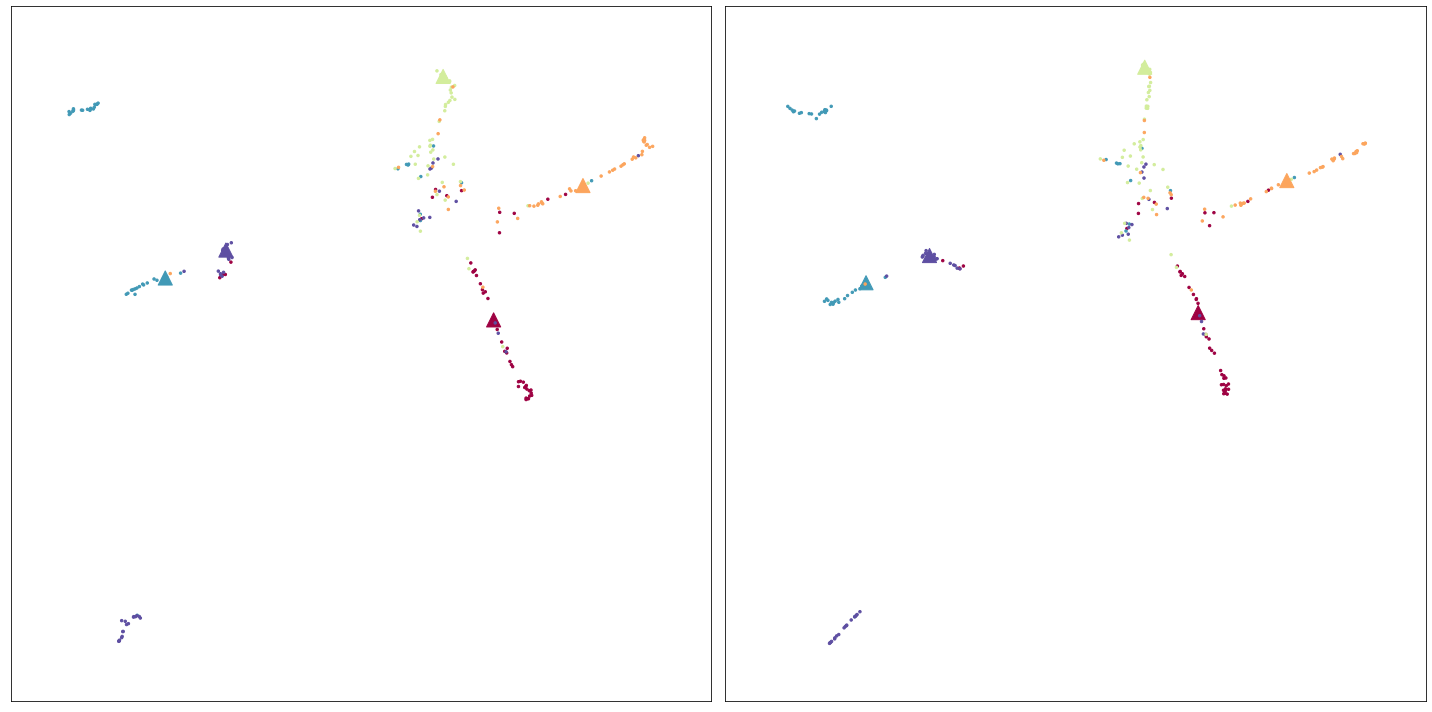

In [217]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

fig, axs = plt.subplots(1,2, figsize=(20, 10))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = tgts[0]
    if i == 0:
        ax.scatter(*aligned_mapper.embeddings_[i][:5].T, marker='^', c=current_target[:5], s=200, cmap="Spectral")
        ax.scatter(*aligned_mapper.embeddings_[i].T, s=6, c=current_target, cmap="Spectral")
    else:
        ax.scatter(*aligned_mapper.embeddings_[i][0:5].T, marker='^', c=current_target[0:5], s=200, cmap="Spectral")
        ax.scatter(*aligned_mapper.embeddings_[i].T, s=6, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()

In [189]:
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D

reducer = umap.UMAP(n_neighbors=20, min_dist=0)
embedding = reducer.fit_transform(embs[0])
embedding.shape

(255, 2)

(50, 2)


Text(0.5, 1.0, 'Embedding Space')

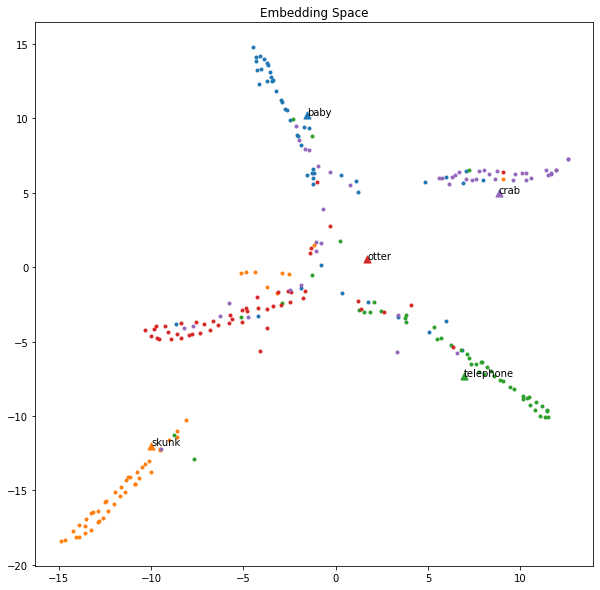

In [93]:
from sklearn.decomposition import PCA
words_proj = PCA(n_components=50).fit_transform(emb_inp)

from sklearn.manifold import TSNE
words_proj = TSNE(n_components=2).fit_transform(emb_inp)

class_proj = words_proj[:len(class_names)]
words_proj = words_proj[len(class_names):]

embedding_projs = [None] * len(class_names)

for class_idx in range(len(class_names)):
    embedding_projs[class_idx] = words_proj[:NUM_EMBEDDINGS_PER_CLASS]
    words_proj = words_proj[NUM_EMBEDDINGS_PER_CLASS:]

print(embedding_projs[-1].shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

from matplotlib.pyplot import cm

COLOR_BY_TASK = False

for i, name in enumerate(class_names):
    p = ax.plot(embedding_projs[i][:, 0], embedding_projs[i][:, 1], '.', label=name)
    ax.scatter([class_proj[i, 0]], [class_proj[i, 1]], marker='^', color=p[0].get_color(), s=50)

for i, name in enumerate(class_names):
    ax.annotate(name, (class_proj[i, 0] + 0.01, class_proj[i, 1] + 0.01))

plt.title('Embedding Space')

In [196]:
class_proj = embedding[:len(class_names)]
words_proj = embedding[len(class_names):]

embedding_projs = [None] * len(class_names)

for class_idx in range(len(class_names)):
    embedding_projs[class_idx] = words_proj[:NUM_EMBEDDINGS_PER_CLASS]

print(embedding_projs[-1].shape)

(50, 2)


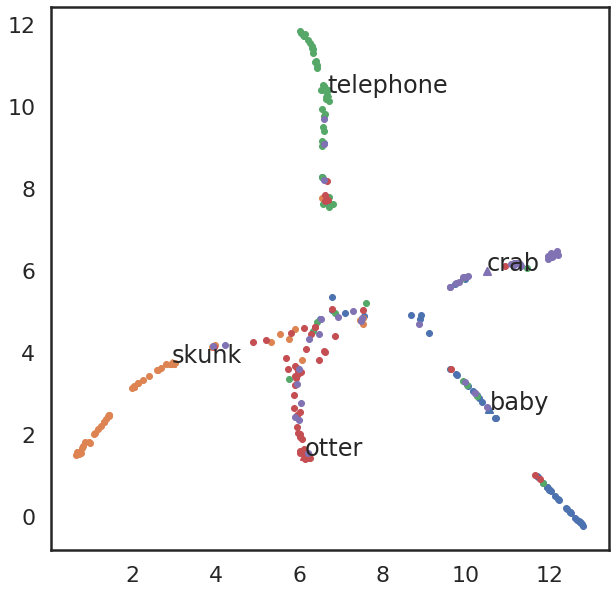

In [191]:
import seaborn as sns
sns.set(style='white', context='poster')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

from matplotlib.pyplot import cm

for i, name in enumerate(class_names):
    p = ax.plot(embedding_projs[i][:, 0], embedding_projs[i][:, 1], '.', label=name)
    ax.scatter([class_proj[i, 0]], [class_proj[i, 1]], marker='^', color=p[0].get_color(), s=50)

for i, name in enumerate(class_names):
    # print(i,name)
    ax.annotate(name, (class_proj[i, 0] + 0.01, class_proj[i, 1] + 0.01))
